In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd

from sklearn.manifold import TSNE

# Paired comparison (within group)
from scipy.stats import ttest_rel
from scipy.stats import wilcoxon

# Unpaired comparison (between group)
from scipy.stats import ttest_ind
from scipy.stats import ranksums

from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.anova import anova_lm

# %matplotlib inline 
# Display plots within Jupyter notebook


### Load example dataset

In [ ]:
from sklearn.datasets import load_iris, load_diabetes
from scipy.stats import shapiro # Test if data follows Normal distribution

print('Loading iris dataset..\n')
data_iris = load_iris() # iris 데이터셋 로딩

print('Target names: ', data_iris.target_names)
print('Feature names: ', data_iris.feature_names)

Loading iris dataset..

Target names:  ['setosa' 'versicolor' 'virginica']
Feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
X, y = data_iris.data, data_iris.target # 데이터와 타깃(label) 분리

# 각 클래스(0, 1, 2)에 해당하는 데이터 분리
X_class0 = X[y == 0]    # 클래스 0 (Setosa)
X_class1 = X[y == 1]    # 클래스 1 (Versicolor)
X_class2 = X[y == 2]    # 클래스 2 (Virginica)

### Display recuded feature map using t-SNE and PCA (t-SNE 및 PCA를 사용하 추천 특징 맵 표시)
t-SNE (t-distributed stochatic neighbor embedding); now look at UMAP (Uniform Manifold Approximation and Projection)
PCA (Principal component analysis)

Normality test on X
X: Statistics=0.876, p=0.000



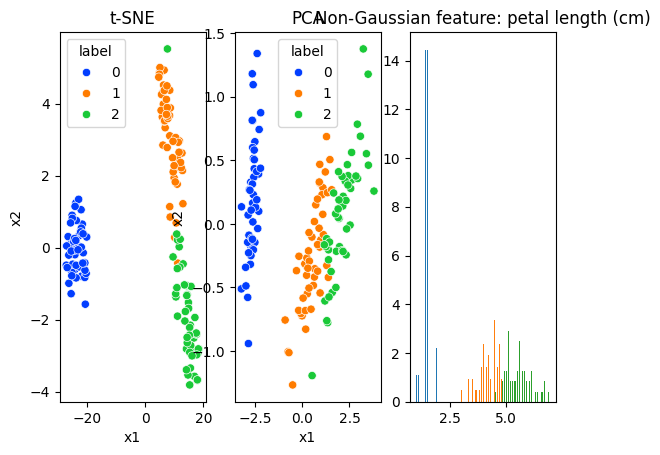

In [6]:
# 1. 차원 축소 시각화(t-SNE와 PCA 비교)
# 2. 특정 feature의 클래스별 분포 시각화
# 3. 정규성 검정을 통해 분포 특성 판단


# t-SNE 모델 생성: 고차원 데이터를 2차원으로 축소(비선형 차원 축소 기법)
mdl = TSNE(n_components=2, random_state=0)
X_embedded = mdl.fit_transform(X)   # 원래 데이터를 2차원으로 임베딩

fig, ax = plt.subplots(1, 3)    # 서브플롯 생성: 총 1행 3열짜리 플롯 공간 생성
palette = sns.color_palette("bright", 3)    # 색상 팔레트 설정 (클래스별 구분을 위한 3가지 색)

# 임베딩된 결과를 Pandas 데이터프레임으로 저장
df_embedded = pd.DataFrame({'x1': X_embedded[:, 0], 'x2': X_embedded[:, 1], 'label': y})

# t-SNE 결과 시각화 (첫 번째 서브플롯)
sns.scatterplot(data=df_embedded, x='x1', y='x2',
                hue=df_embedded["label"], palette=palette, ax=ax[0], legend='full')
ax[0].set_title('t-SNE')    # 플롯 제목 설정


# PCA 모델 생성: 고차원 데이터를 2차원으로 축소 (선형 차원 축소 기법)
mdl2 = PCA(n_components=2)
X_embedded_PCA = mdl2.fit_transform(X)

palette = sns.color_palette("bright", 3)

# PCA 결과를 다시 데이터프레임으로 저장
df_embedded = pd.DataFrame({'x1': X_embedded_PCA[:, 0], 'x2': X_embedded_PCA[:, 1], 'label': y})

# PCA 결과 시각화 (두 번째 서브플롯)
sns.scatterplot(data=df_embedded, x='x1', y='x2',
                hue=df_embedded["label"], palette=palette, ax=ax[1], legend='full')
ax[1].set_title('PCA')


# 세 번째 서브플롯: 특정 feature(꽃잎 너비, index=2)의 분포를 클래스별로 히스토그램으로 그림
# Display non-Gaussian distribution (or Gausssian mixture) regardless of target class
ax[2].hist(X_class0[:, 2], bins=50, density=True)    # plot the histogram(클래스 0의 분포)
ax[2].hist(X_class1[:, 2], bins=50, density=True)    # plot the histogram(클래스 1의 분포)
ax[2].hist(X_class2[:, 2], bins=50, density=True)    # plot the histogram(클래스 2의 분포)

# Shapiro-Wilk 정규성 검정 수행 (전체 데이터의 세 번째 특성에 대해)
stat, p = shapiro(X[:, 2])
print('Normality test on X')
print('X: Statistics=%.3f, p=%.3f\n' % (stat, p)) # Non-Gaussian if p < 0.05(p < 0.05면 정규분포가 아님 (비정규성))

# 정규성 검정 결과에 따라 플롯 제목을 다르게 설정
if p < 0.05:
    ax[2].set_title('Non-Gaussian feature: '+ data_iris.feature_names[2])   # 정규분포 아님
else:
    ax[2].set_title('Gaussian feature: '+ data_iris.feature_names[2])   # 정규분포

[결과: t-SNE, PCA 시각화 + 정규성 히스토그램]
- 1. t-SNE 시각화(왼쪽)
    - 데이터 차원을 4D -> 2D로 축소하여 시각화한 결과
    - 클래스 0, 1, 2가 색상으로 구분되어 있음(파랑, 주황, 초록)
    - 클래스 0은 다른 클래스들과 확연히 떨어져 있음 -> 다른 클래스보다 특징이 명확함
    - 클래스 1과 2는 약간 겹침 -> 구분이 t-SNE 상에서는 어렵지 않지만, PCA보다 약간 더 분리됨
- 2. PCA 시각화(중간)
    - PCA를 통해 선형 방식으로 차원 축소한 결과
    - 클래스 0, 1, 2가 비교적 선형적인 축을 따라 나뉨
    - t-SNE보다 덜 분리되어 있음. 특히 클래스 1과 2는 더 많이 섞여 있음
    - 이는 PCA가 선형적 관계만 보존하기 때문에, 비선형적인 구조를 반영하기 어려움
- 3. 히스토그램 + 정규성 검정(오른쪽)  
    - 세 번째 feature(petal length (cm))에 대한 클래스별 분포를 히스토그램으로 표시
    - 클래스별로 보면 각각은 종 모양에 가까운 정규분포 형태지만,
    - 전체 데이터를 보면 여러 정규분포가 섞인 형태(Gaussian Mixture)
    - 제목에 Non-Gaussian feature로 표시된 이유는, 전체 데이터가 Shapiro-Wilk 검정에서 p < 0.05로 나왔기 때문
        -> 정규분포를 따르지 않음(귀무가설 기각됨)

### Figure

t-SNE and PCA succefully reduced data dimension from 4 to 2, and their scattor plots show that class 0, 1, and 2 are well separated, while class 0 is more distinct from class 1 and 2. We will cover t-SNE, UMAP, PCA later in this semester.
- t-SNE와 PCA는 4차원의 데이터를 성공적으로 2차원으로 축소하였고, 그에 따른 산점도는 클래스 0, 1, 2가 잘 구분되는 모습을 보여준다.
- 특히 클래스 0은 크래스 1과 2보다 더 뚜렷하게 분리되어 있다.
- t-SNE, UMAP, PCA에 대한 자세한 내용은 이번 학기 후반에 다룰 예정이다.

### Histogram & Normality test (Shapiro)

Histogram (class 0, 1, and 2) showed that all data combining all classes are non-Gaussian (Gaussian mixtures - each within class feature seems following Gaussian distribution), and null hypothesis is rejected with p < 0.05, indicating that it does not follow Gaussian distribution
- 클래스 0, 1, 2에 대한 히스토그램을 보면, 전체 데이터를 통합했을 때는 정규분포를 따르지 않으며, 이는 여러 개의 정규분포가 혼합된 형태(Gaussian Mixtures)로 해석될 수 있다.
- 각 클래스 내에서는 정규분포를 따르는 경향을 보이지만, 전체적으로는 그렇지 않다.
- Shaprio-Wilk 검정 결과 p < 0.05로 나타나 귀무가설이 기각되며, 이로 인해 해당 데이터는 정규분포를 따르지 않는다고 판단할 수 있다.
    - 귀무가설?
        - 통계 검정에서 기본적으로 '참'이라고 가정하는 주장
        - '차이가 없다', '효과가 없다', '정규분포를 따른다' 같은 형태로 쓰임
        - 예를 들어, Shapiro-Wilk 검정에서는 귀무가설이 아래와 같이 정해진다:  
            - 이 데이터는 정규분포(Normal Distribution)를 따른다.
            - 즉, 검정을 하기 전에는 이 데이터는 정규분포다라고 가정
    - Shapiro-Wilk 검정?
        - 주어진 데이터가 정규분포(가우시안 분포)를  따르는지 확인하는 검정 방법
        - 작은 샘플(50개~2000개 정도)에 특히 적합
        - 결과로 뭘 주냐면:
            - 검정 통계량(W 값)과 p-value(유의 확률)
            - 이 두 가지가 나온다.
        - p-value가 뭐야? (p<0.05)
            - 귀무가설이 맞다는 전제 하에, 지금 얻은 데이터가 나올 확률
            - p < 0.05란?   
                - 보통 유의수준을 0.05(=5%)로 잡는다.
                - p < 0.05면 우리가 얻은 데이터가 우연히 생길 확률이 너무 낮다는 뜻
                - 그래서 귀무가설 기각
    - 정리
        - 귀무가설: 이 데이터는 정규분포를 따른다.
        - Shapiro-Wilk 검정: 데이터가 정규분포인지 판단하는 통계적 방법
        - p < 0.05: 정규분포라고 보기에는 가능성이 낮다. -> 정규 분포 아님으로 결론
----------------------------------------------

### Compare two classes

Target: 'versicolor', 'virginica'
Feature: 'petal length (cm)'

Samples: 50 per class (target)

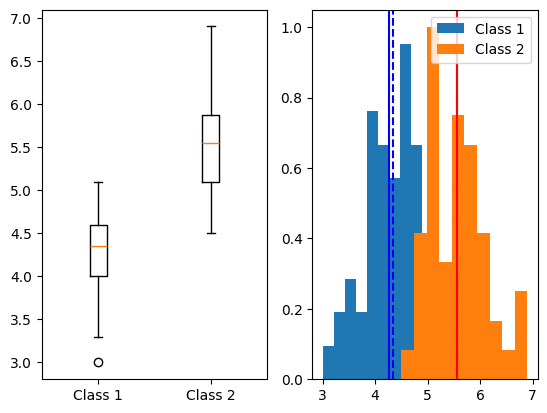

In [ ]:
# 클래스 1과 클래스 2의 세 번째 feature(예: petal width)를 비교할 테스트 데이터 설정
test_x1 = X_class1[:, 2]
test_x2 = X_class2[:, 2]

fig, ax = plt.subplots(1, 2)    # 1행 2열의 서브플롯 생성

# 첫 번째 서브플롯: Boxplot을 이용해 클래스 1과 2의 분포 비교
ax[0].boxplot([test_x1, test_x2])   # 각 클래스의 값들을 박스플롯으로 시각화
ax[0].set_xticklabels(['Class 1', 'Class 2'])   # x축 라벨 설정

# 두 번째 서브플롯: 히스토그램을 이용한 분포 비교
ax[1].hist(test_x1, density=True)    # plot the histogram(클래스 1, 정규화된 밀도)
ax[1].hist(test_x2, density=True)    # plot the histogram(클래스 2, 정규화된 밀도)
ax[1].legend(['Class 1', 'Class 2'])    # 범례 추가

# 클래스 1의 평균과 중앙값에 수직선 추가
ax[1].axvline(np.mean(test_x1), color='b') # Average(파란색 실선 = 평균)
ax[1].axvline(np.median(test_x1), color='b', linestyle='--') # Median(파란색 점선 = 중앙값)

# 클래스 2의 평균과 중앙값에 수직선 추가
ax[1].axvline(np.mean(test_x2), color='r') # Average(빨간색 실선 = 평균)
ax[1].axvline(np.median(test_x2), color='r', linestyle='--') # Median(빨간색 점선 = 중앙값)


[결과: Boxplot + 클래스 간 히스토그램 비교]
- 1. Boxplot(왼쪽)
    - 클래스 1과 클래스 2에 대한 세 번째 feature의 중앙값, 사분위 범위, 이상치 등을 시각적으로 비교
    - 클래스 2가 클래스 1보다 전체적으로 높은 값 분포를 보임
    - 중앙값도 클래스 2가 높고, 전체 분포 범위도 더 높게 퍼져 있음
- 2. Histogram + 평균/중앙값 표시(오른쪽)
    - 클래스 1(파랑), 클래스 2(주황)의 히스토그램 비교
    - 평균과 중앙값을 각각 실선(평균), 점선(중앙값)으로 표시
    - 클래스 1은 평균과 중앙값이 유사 -> 거의 대칭적인 분포
    - 클래스 2는 평균과 중앙값이 약간 차이가 남 -> 약간 비대칭적인 분포일 수 있음
    - 전반적으로 클래스 간 분포 차이가 명확히 존재함

For the selected feature, class 2 exhibits higher values in average. In terms of data distribution, class 1 and class 2 data seems following Gaussian distribution. (dotted line: median, solid line: average)
- 선택한 기능의 경우 클래스 2는 평균적으로 더 높은 값을 나타낸다.
- 데이터 분포 측면에서 클래스 1과 클래스 2 데이터는 가우시안 분포를 따른다.
- 점선: 중앙값, 실선: 평균
--------------------------------------------------------------

In [ ]:
# Shapiro-Wilk 정규성 검정을 사용해서 test_x1과 test_x2가 정규분포를 따르는지 아닌지 판단하는 과정
# p-value가 작을수록 정규분포가 아니라고 판단
stat, p = shapiro(test_x1)
print('X1: Statistics=%.3f, p=%.3f' % (stat, p)) # Non-Gaussian if p < 0.05
stat, p = shapiro(test_x2)
print('X2: Statistics=%.3f, p=%.3f' % (stat, p)) # Non-Gaussian if p < 0.05

X1: Statistics=0.966, p=0.158
X2: Statistics=0.962, p=0.110


Shapiro test on class 1 and class 2 do not reject null hypothesis, so they are Gaussian with respect to shapiro test
- 클래스 1과 클래스 2에 대한 Shapiro 테스트는 귀무 가설을 기각하지 않으므로 Shapiro 테스트에 대해 가우시안이다.
------------------------------------------------------

### Applying various statistical tests(다양한 통계 검정 적용)
- Unpaired test: comparison between two groups (sample numbers can be different)
    - Unpaired Student's t-test; Gaussian
    - Ranksum test; non-Gaussian
- Paired test: comparison within group (sample numbers should be the same)
    - Paired Student's t-test; Gaussian
    - Wilcoxon's signed rank test; non-Gaussian

- 비대응 검정(Unpaired test): 서로 다른 두 집단 간 비교(샘플 수가 달라도 됨)
    - 비대응 Student의 t-test: 데이터가 정규분포일 때 사용(ttest_ind)
    - Rank-sum 검정(Mann-Whitney U test): 데이터가 정규분포가 아닐 때 사용(ranksums)
- 대응 검정(Paired test):
    - 같은 집단 내에서 전후 또는 쌍을 이룬 데이터 비교(샘플 수가 같아야 함)
        - 대응 Student의 t-test: 데이터가 정규분포일 때 사용(ttest_rel)
        - Wilcoxon 부호 순위 검정: 데이터가 정규분포가 아닐 때 사용(wilcoxon)

In [9]:
# 데이터가 정규분포일 때, 비대응 Student의 t-test
# 두 그룹 간 평균 차이를 비교하는 비대응 Student의 t-test(정규분포 가정)
res_ttest_ind = ttest_ind(test_x1, test_x2) # diff. btw. two group (두 그룹의 평균 차이 검정)
print('Unpaired t-test')    # 비대응 t-test 결과 출력
print('p-val: ', res_ttest_ind.pvalue)  # p-value 출력
print('t-val: ', res_ttest_ind.statistic)   # t 통계량 출력

# 데이터가 정규분포일 때, 대응 Student의 t-test
# 대응 데이터 간 차이의 평균을 비교하는 대응 Student의 t-test
res_ttest_rel = ttest_rel(test_x1, test_x2) # average of diff. (동일한 샘플 쌍 간 평균 차이 검정)
print('Paired t-test')  # 대응 t-test 결과 출력
print('p-val: ', res_ttest_rel.pvalue)
print('t-val: ', res_ttest_rel.statistic)


# 데이터가 정규분포가 아닐 때, 대응 Wilcoxon 부호 순위 검정
# 대응 데이터 간 순위 차이에 대한 비모수 검정 (정규분포가 아닐 경우 사용)
res_wilcoxon_signed_rank = wilcoxon(test_x1, test_x2)   # Wilcoxon 부호 순위 검정
print('Wilcoxon signed rank test')  # 대응 비모수 검정 결과 출력
print('p-val: ', res_wilcoxon_signed_rank.pvalue)

# 데이터가 정규분포가 아닐 때, 비대응 Rank-sum 검정(Mann-Whitney U test)
# 두 그룹 간 순위 기반 비교를 수행하는 Rank sum test (비대응 비모수 검정)
res_wilcoxon_ranksum = ranksums(test_x1, test_x2)   # Mann-Whitney U test와 동일한 역할
print('Wilcoxon rank sum test')         # Mann-Whitney U test(비대응 비모수 검정 결과 출력)
print('p-val: ', res_wilcoxon_ranksum.pvalue) 

Unpaired t-test
p-val:  3.1788195478061495e-22
t-val:  -12.603779441384985
Paired t-test
p-val:  2.5623202280611684e-16
t-val:  -12.090563344949114
Wilcoxon signed rank test
p-val:  2.0099446980338513e-09
Wilcoxon rank sum test
p-val:  9.529977763570097e-17


[결과]
- 1. Unpaired t-test(비대응 t-test)
    - 이 검정은 클래스 1과 클래스 2의 평균 차이가 유의미한지를 확인하는 것
    - p < 0.05이므로 귀무가설(두 집단 평균이 같다)은 기각
        - 클래스 1과 2는 평균값이 통계적으로 다르다는 의미
- 2. Paired t-test(대응 t-test)
    - 이 검정은 두 데이터가 대응 쌍으로 구성되었을 때, 각 샘플 간의 차이 평균이 0인지 확인하는 방식
    - 근데 test_x1과 test_x2는 사실 대응 데이터가 아니다. -> 이 검정은 의미가 없다.
    - 이 결과는 참고만 하고, 주된 해석은 Unpaired t-test를 따라야 한다.
- 3. Wilcoxon signed-ran test(대응 비모수 검정)
    - 역시 Paired t-test와 마찬가지로 대응쌍이 전제되어야 하므로, test_x1과 test_x2에 대해서는 사용이 적절하지 않다.
    - 참고만 하자.
- 4. Wilcoxon rank-sum test(비대응 비모수 검정)
    - (= Mann-Whitney U test)
    - 이 검정은 두 그룹 간 순위 기반 분포 차이를 비교하는 것
    - 정규분포가 아닐 경우 t-test 대신 사용
    - 여기서도 p < 0.05 -> 두 그룹의 값 분포가 통계적으로 다르다는 결론
- -> 클래스 1과 클래스 2는 동일한 분포가 아니다.
- -> 평균과 분포 모두 통계적으로 유의미한 차이가 있음
- -> 정규성을 가정해도(t-test), 가정하지 않아도(rank-sum), 결과는 일관됨

In this example, comparing petal lengh of 'versicolor' and 'virginica' is unpaired comparison, and data follow Gaussian distribution.

Therefore, unpaired Student's t-test seems correct choice

- 이 예시에서 '버시컬러'와 '버지니카'의 꽃잎 길이를 비교하는 것은 짝지어지지 않은 비교이며, 데이터는 가우시안 분포를 따른다.
- 따라서, 비대응 Student의 t-test가 올바른 선택인 것 같다.
----------------------------------------------------------------------

### Simulating data deficiency(데이터 부족 시뮬레이션)

Let's select a part of data (e.g., 10 out of 50 samples), then perform the same analysis
- 데이터의 일부(예: 50개 샘플 중 10개)를 선택한 다음 동일한 분석을 수행
- 전체 데이터가 아닌 무작위로 선택된 일부 샘플(subsample)을 시각적으로 비교하려는 목적
- 이렇게 하면 소수의 샘플만 있어도 분포의 경향성을 확인할 수 있다.
- 필요하면 seed=42 같은 식으로 고정해서 항상 동일한 샘플을 재현할 수 있다.

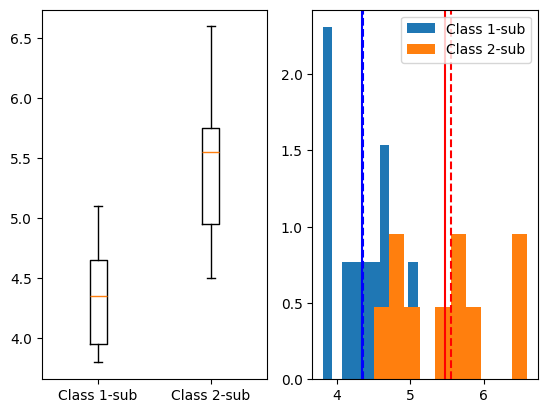

In [ ]:
# 입력 데이터 X_in에서 M개의 행을 무작위로 선택하여 서브샘플링하는 함수 정의
def choose_subsamples_rows(X_in, M, seed=None):
    np.random.seed(seed)    # 재현 가능한 무작위 추출을 위한 시드 설정
    indicies_sub = np.random.choice(X_in.shape[0], size=M, replace=False)   # 중복 없이 M개 샘플 선택
    return X_in[indicies_sub]   # 선택된 샘플 반환

# 서브샘플 개수 설정
M = 10

# 클래스 1과 클래스 2에서 각각 M개의 샘플을 무작위로 추출
X_class1_sub = choose_subsamples_rows(test_x1, M)
X_class2_sub = choose_subsamples_rows(test_x2, M)

# 1행 2열의 서브플롯 생성
fig, ax = plt.subplots(1, 2)

# 첫 번째 서브플롯: 클래스 1과 2 서브샘플의 박스플롯
ax[0].boxplot([X_class1_sub, X_class2_sub]) # 두 서브샘플의 분포 비교
ax[0].set_xticklabels(['Class 1-sub', 'Class 2-sub'])   # x축 라벨 지정

# 두 번째 서브플롯: 히스토그램으로 두 서브샘플의 분포 시각화
ax[1].hist(X_class1_sub, density=True)    # plot the histogram(클래스 1, 정규화)
ax[1].hist(X_class2_sub, density=True)    # plot the histogram(클래스 2, 정규화)
ax[1].legend(['Class 1-sub', 'Class 2-sub'])    # 범례 추가

# 클래스 1 평균 및 중앙값 표시 (파란색)
ax[1].axvline(np.mean(X_class1_sub), color='b') # Average
ax[1].axvline(np.median(X_class1_sub), color='b', linestyle='--') # Median

# 클래스 2 평균 및 중앙값 표시 (빨간색)
ax[1].axvline(np.mean(X_class2_sub), color='r') # Average
ax[1].axvline(np.median(X_class2_sub), color='r', linestyle='--') # Median

[결과]
- 1. 왼쪽: Boxplot(박스플롯)
    - Class 1-sub
        - 중앙값이 약 4.4 근처에 있음
        - 하단 사분위수(Q1)는 약 3.8, 상단 사분위수(Q3)는 약 5.0
        - 전체적으로 값이 낮은 쪽에 분포하고 있고, 범위가 좁은 편
    - Class 2-sub
        - 중앙값이 약 5.6 근처
        - Q1 = 5.0, Q3 = 6.2
        - Class 1보다 전반적으로 높은 값 분포를 가짐
    - 시각적으로 봐도 두 클래스의 값 분포가 서로 다름을 알 수 있다.
    - 평균뿐 아니라 분산도 약간 다름
- 2. 오른쪽: Histogram + 평균/중앙값
    - 파란색 = Class 1-sub, 주황색 = Class 2-sub
    - 수직선 표시
        - 실선 = 평균값
        - 점섬 = 중앙값
    - Class 1-sub(파란색)
        - 평균과 중앙값이 비슷 -> 대칭적인 분포
    - Class 2-sub(주황색)
        - 이 또한 거의 대칭적이지만, 클래스 1보다 전체적으로 높게 이동된 분포
----------------------------------------------------------

Selecting 10 subsamples showed the same trend (class 2 > class 1), but data distribution seems non-Gaussian
- 10개의 하위 샘플을 선택한 결과 동일한 경향(클래스 2 > 클래스1)이 나타났지만
- 데이터 분포는 비가우시안적인 것으로 보인다.

In [ ]:
# 데이터 수가 너무 적을 경우(예: 샘플 수가 10개)에는 정규성 검정 결과가 신뢰하기 어려움
# Not reliable when data is not enough
stat, p = shapiro(X_class1_sub)

# 클래스 1 서브샘플에 대해 Shapiro-Wilk 정규성 검정 수행
print('Shapiro test on X1: Statistics=%.3f, p=%.3f' % (stat, p)) # Non-Gaussian if p < 0.05

# 클래스 2 서브샘플에 대해 Shapiro-Wilk 정규성 검정 수행
stat, p = shapiro(X_class2_sub)
print('Shapiro test on X2: Statistics=%.3f, p=%.3f' % (stat, p)) # Non-Gaussian if p < 0.05

Shapiro test on X1: Statistics=0.949, p=0.654
Shapiro test on X2: Statistics=0.957, p=0.751


However, Shapiro test is not always reliable especially data is not enough. Be sure to check normality test and visually checking data distribution
- 그러나 Shapiro 테스트는 항상 신뢰할 수 있는 것은 아니며, 특히 데이터가 충분하지 않다.
- 정규성 테스트와 시각적 데이터 분포를 확인해야 한다.

In [ ]:
# 두 서브샘플 간 평균 차이를 검정하는 비대응 Student의 t-test (정규분포 가정)
res_ttest_ind = ttest_ind(X_class1_sub, X_class2_sub)
print('Unpaired t-test')    # 비대응 t-test 결과 출력
print('p-val: ', res_ttest_ind.pvalue)  # p-value 출력(0.05보다 작으면 유의미한 차이)
print('t-val: ', res_ttest_ind.statistic)   # t 통계량 출력
# -> ttest_ind: 두 집단이 독립적일 때 적합한 검정

# 두 서브샘플 간 차이의 평균을 검정하는 대응 Student의 t-test
# ⚠️ 데이터가 실제 대응쌍이 아니라면 사용이 부적절함
res_ttest_rel = ttest_rel(X_class1_sub, X_class2_sub)
print('Paired t-test')  # 대응 t-test 결과 출력
print('p-val: ', res_ttest_rel.pvalue)
print('t-val: ', res_ttest_rel.statistic)
# -> ttest_rel: 쌍을 이룬 대응 데이터일 때 적합한 검정(여기선 사실상 부적절)

# 대응쌍 데이터에 대해 순위 기반의 비모수 검정을 수행하는 Wilcoxon 부호 순위 검정
# ⚠️ 마찬가지로, 진짜 대응쌍이 아닐 경우 이 결과는 신뢰하기 어려움
res_wilcoxon_signed_rank = wilcoxon(X_class1_sub, X_class2_sub)
print('Wilcoxon signed rank test')  # 대응 비모수 검정 결과 출력
print('p-val: ', res_wilcoxon_signed_rank.pvalue)
# -> wilcoxon: 쌍을 이룬 대응 데이터일 때 적합한 검정(여기선 사실상 부적절)

# 두 독립된 집단 간 순위 기반 비교를 수행하는 Wilcoxon Rank Sum Test (Mann-Whitney U Test와 동일)
res_wilcoxon_ranksum = ranksums(X_class1_sub, X_class2_sub)
print('Wilcoxon rank sum test')         # Mann-Whitney U test(비대응 비모수 검정 결과 출력)
print('p-val: ', res_wilcoxon_ranksum.pvalue)
# -> ranksums: 두 집단이 독립적일 때 적합한 검정


Unpaired t-test
p-val:  0.00026852566185702457
t-val:  -4.514089441329289
Paired t-test
p-val:  0.0030008074414835757
t-val:  -4.023807885614351
Wilcoxon signed rank test
p-val:  0.00390625
Wilcoxon rank sum test
p-val:  0.000880743190741727


[결과]
- 1. Unpaired t-test (비대응 t-검정)
    - 이 검정은 클래스 1-sub vs 클래스 2-sub의 평균 차이가 유의미한지를 비교한 것.
    - p < 0.05이므로 귀무가설(두 그룹 평균이 같다)을 기각함
    - 두 서브샘플의 평균값은 통계적으로 유의미하게 다름
- 2. Paired t-test (대응 t-검정)
    - 두 그룹이 실제 대응쌍이 아니라는 점에서 이 검정은 부적절하지만,
    - 참고용으로 보면 여전히 유의미한 차이가 있다고 나옴 (p < 0.05)
- 3. Wilcoxon signed-rank test (대응 비모수 검정) 
    - 이 또한 대응쌍을 전제로 하기 때문에 정확한 조건에 부합하진 않지만, p < 0.05 -> 두 그룹이 통계적으로 다르다는 결과
- 4. Wilcoxon rank-sum test (비대응 비모수 검정) (= Mann-Whitney U test)
    - 이 검정은 비정규 분포 데이터 또는 샘플 수가 적을 때 적합
    - test_x1_sub과 test_x2_sub가 서로 다른 분포에서 왔을 가능성이 높음
---------------------------------------------------------------

### Test with similar data(유사한 데이터로 테스트)

Previous example showed very distinct feature map between classes. Then let's split one class data into two parts; they should be similar
- 이전 예제에서는 클래스 간에 매우 뚜렷한 특징 맵을 보여주었다.
- 그런 다음 하나의 클래스 데이터를 두 부분으로 나누면 비슷해야 한다.

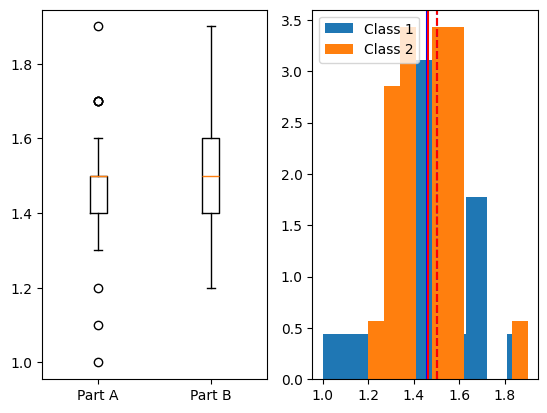

In [ ]:
# 같은 클래스(class 0)의 데이터를 두 그룹으로 나눔 -> 이 둘은 유사한 분포를 가져야 함

# 클래스 0 데이터를 절반으로 나눔 (총 50개 중 앞 25개와 뒤 25개)
# Split the same class data into two groups - they should be similar
X_class1_splitA = X_class0[:25, :]
X_class1_splitB = X_class0[25:, :]

# 세 번째 feature(예: petal length)에 대해서만 추출
X_partA = X_class1_splitA[:, 2]
X_partB = X_class1_splitB[:, 2]

# 1행 2열의 서브플롯 생성
fig, ax = plt.subplots(1, 2)

# 첫 번째 서브플롯: 박스플롯으로 두 파트의 분포 시각화
ax[0].boxplot([X_partA, X_partB])   # 두 그룹의 값 범위, 중앙값 등을 비교
ax[0].set_xticklabels(['Part A', 'Part B']) # x축 레이블 설정

# 두 번째 서브플롯: 히스토그램으로 분포 비교
ax[1].hist(X_partA, density=True)    # plot the histogram(Part A의 히스토그램 (밀도 기준))
ax[1].hist(X_partB, density=True)    # plot the histogram(Part B의 히스토그램 (밀도 기준))
ax[1].legend(['Class 1', 'Class 2'])    # 범례 표시 (사실상 둘 다 같은 클래스지만 구분용)

# Part A의 평균(실선)과 중앙값(점선)을 파란색으로 표시
ax[1].axvline(np.mean(X_partA), color='b') # Average
ax[1].axvline(np.median(X_partA), color='b', linestyle='--') # Median

# Part B의 평균(실선)과 중앙값(점선)을 빨간색으로 표시
ax[1].axvline(np.mean(X_partB), color='r') # Average
ax[1].axvline(np.median(X_partB), color='r', linestyle='--') # Median

[결과]
- 같은 클래스 데이터를 둘로 나눴을 대, 통걔적 차이가 거의 없어야 정상
- 이후 t-test나 rank-sum 검정을 통해 유사하다는 결과가 나오는지를 확인하는 게 목적
- 1. 왼쪽: Boxplot(박스플롯)
    - Part A, Part B 모두 중앙값이 거의 비슷
    - Part A는 이상치가 더 많이 존재하는 반면, Part B는 더 넓은 범위로 퍼져 있다.
    - 전체적으로 중앙값은 같고, 분산은 약간 다를 수 있다.
    - -> 큰 차이는 없고, 데이터 구조상 자연스러운 편차로 볼 수 있다. 
- 2. 오른쪽: Histogram + 평균/중앙값
    - 수직선:
        - 실선 = 평균값
        - 점선 = 중앙값
    - Part A(파랑)
        - 거의 대칭적인 분포
    - Part B(주황)
        - 평균과 중앙값도 유사하고, 중심 위치도 Part A와 비슷
        - 약간 좌우에 퍼져 있지만 전체적으로 큰 차이가 없음
- 시각적으로는 유의미한 차이가 없음
- 평균과 중앙값이 비슷하며, 분포도 전반적으로 겹침
- -> 이는 같은 클래스에서 나눈 것이므로 정상적이고 타당한 결과

For now, boxplot showed similar averages, and histrogram showed overlapping data distribution, while maintaining Gaussian-like distribution.
- 현재로서는 박스플롯이 비슷한 평균을 보였고, 히스토그램은 가우시안 분포를 유지하면서 데이터 분포가 겹치는 것으로 나타났다.
-------------------------------------------------

Shapiro-Wilk 검정은 데이터가 정규분포인지 아닌지를 판단하는 대표적인 방법

하지만 샘플 수가 너무 적거나(보통 30 미만) 이상치가 많으면 결과의 신뢰도가 떨어질 수 있다.

출력되는 p-value를 해석할 때는:
- p < 0.05 → 정규분포가 아니다 (귀무가설 기각)
- p ≥ 0.05 → 정규분포일 수 있다 (귀무가설 채택)

In [ ]:
# ⚠️ 데이터 수가 적을 경우 정규성 검정(Shapiro-Wilk)의 신뢰도가 낮을 수 있음

# Part A 데이터에 대해 Shapiro-Wilk 정규성 검정 수행
# Not reliable when data is not enough
stat, p = shapiro(X_partA)
print('Shapiro test on X1: Statistics=%.3f, p=%.3f' % (stat, p)) # Non-Gaussian if p < 0.05
# p < 0.05면 정규분포가 아니라는 뜻 → 귀무가설 기각

# Part B 데이터에 대해서도 동일하게 정규성 검정 수행
stat, p = shapiro(X_partB)
print('Shapiro test on X2: Statistics=%.3f, p=%.3f' % (stat, p)) # Non-Gaussian if p < 0.05
# p < 0.05면 정규분포를 따르지 않음

Shapiro test on X1: Statistics=0.950, p=0.251
Shapiro test on X2: Statistics=0.914, p=0.038


- X1 (Part A) / 0.950 / 0.251 / 정규분포로 볼 수 있음 (귀무가설 채택)
- X2 (Part B) / 0.914 / 0.038 / 정규분포 아님 (귀무가설 기각)
- 두 그룹 중 하나만 정규성을 충족하므로, 두 그룹 간 비교 시에는 비모수 검정을 사용하는 것이 안전함
- 만약 두 그룹이 모두 정규분포를 만족했다면 t-test를 사용해도 된다.

Class 2 (orange color in histrogram above) rejects null hypothesis, indicating it does not follow normal distribution
- 클래스 2(위의 히스토그램에서 주황색)는 귀무가설을 기각하여 정규분포를 따르지 않음을 나타낸다.
-----------------------------------------

In [ ]:
# 두 그룹(Part A, Part B) 간 평균 차이를 비교하는 비대응 Student의 t-test
# 데이터가 정규분포를 따른다는 가정이 필요함
res_ttest_ind = ttest_ind(X_partA, X_partB)
print('Unpaired t-test')    # 비대응 t-test 결과 출력
print('p-val: ', res_ttest_ind.pvalue)  # p-value: 0.05 미만이면 통계적으로 유의미한 차이
print('t-val: ', res_ttest_ind.statistic)   # t 통계량 출력

# 두 그룹을 대응쌍으로 간주하고 평균 차이를 검정하는 대응 Student의 t-test
# Part A, B는 실제 대응쌍이 아니므로 이 결과는 참고용에 불과함
res_ttest_rel = ttest_rel(X_partA, X_partB)
print('Paired t-test')  # 대응 t-test 결과 출력
print('p-val: ', res_ttest_rel.pvalue)
print('t-val: ', res_ttest_rel.statistic)

# 대응쌍에 대한 비모수 검정 (Wilcoxon 부호 순위 검정)
# 정규분포를 따르지 않아도 되지만, 마찬가지로 대응쌍이 아니라는 점에서 부적절할 수 있음
res_wilcoxon_signed_rank = wilcoxon(X_partA, X_partB)
print('Wilcoxon signed rank test')  # 대응 비모수 검정 결과 출력
print('p-val: ', res_wilcoxon_signed_rank.pvalue)

# 비대응 그룹 간 분포 차이를 비교하는 비모수 검정 (Rank sum test = Mann-Whitney U test)
# Part A, B는 독립된 두 그룹이므로 이 검정이 가장 적합함
res_wilcoxon_ranksum = ranksums(X_partA, X_partB)
print('Wilcoxon rank sum test')         # Mann-Whitney U test(비대응 비모수 검정 결과 출력)
print('p-val: ', res_wilcoxon_ranksum.pvalue) 

Unpaired t-test
p-val:  0.9360919429593118
t-val:  -0.08060410782434843
Paired t-test
p-val:  0.9314275194735182
t-val:  -0.08695652173913108
Wilcoxon signed rank test
p-val:  0.6942273651364446
Wilcoxon rank sum test
p-val:  0.9304228600674964


[참고]
- ranksums는 정규성 가정이 필요 없는 비모수 검정이므로
- 두 그룹 중 하나라도 정규분포가 아니라면 가장 적합한 선택
- ttest_rel이나 wilcoxon은 대응쌍 전제 조건이 맞지 않으므로 해석에서 제외하는 것이 좋다.

None of them showed statistical signficance, indicating they are not significantly different in statistical sense. 

Note that applying all possible statistical tests is not appropriate, but we are learning that inappropriate selection could lead to wrong insight, when some tests showed significance and you choose wrong statistical test. 

You must choose one correct statistical test!

- 어느 것도 통계적으로 유의미한 차이를 보이지 않았으며, 이는 통계적 의미에서 유의미한 차이가 없음을 나타낸다.
- 모든 가능한 통계 테스트를 적용하는 것은 적절하지 않지만, 일부 테스트에서 유의미한 결과가 나와 잘못된 통계 테스트를 선택했을 때 부적절한 선택이 잘못된 통찰로 이어질 수 있다는 것을 배우고 잇다.
- 올바른 통계 테스트를 선택해야 한다.
--------------------------------------------

### Test with similar data - not enough data(유사한 데이터로 테스트하기 - 데이터가 충분하지 않을 때 주의)

Let's split part of these similar data. By chance, some random choice exhibit statistical test by selecting only small part of the data. Therefore, you should be careful to rely on statistical test when your data is not enough.
- 이처럼 유사한 데이터에서도 일부만 나누어 비교하면,
- 우연히 선택된 작은 부분 때문에 통계 검정 결과에서 유의미한 차이가 나타날 수 있다.
- 따라서 데이터의 양이 충분하지 않을 경우, 통계 검정 결과에만 의존하는 것은 매우 주의헤야 한다.

Shapiro test on X1: Statistics=0.921, p=0.365
Shapiro test on X2: Statistics=0.841, p=0.046
Unpaired t-test
p-val:  0.5177994617536898
t-val:  0.6596992457003084
Paired t-test
p-val:  0.5436960446640766
t-val:  0.6310547428675063
Wilcoxon signed rank test
p-val:  0.71484375
Wilcoxon rank sum test
p-val:  0.7054569861112734


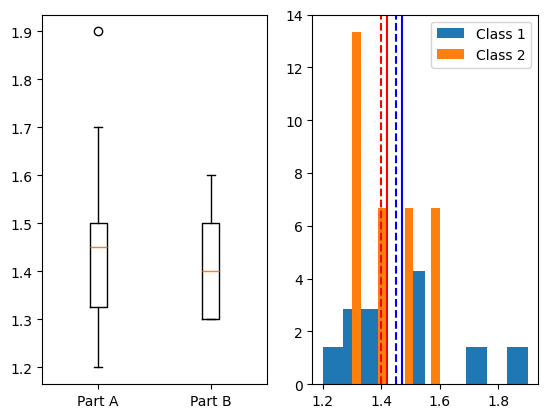

In [16]:
# 데이터 일부를 무작위로 선택하여 서브샘플 생성
# 여러 번 실행하면, 우연히 통계적으로 유의미한 차이가 발생할 수 있음 → 주의 필요

# Choose part of the data
# Run several times until it shows significant difference by chance
M = 10  # 서브샘플 크기 설정

# Part A와 Part B에서 각각 M개의 샘플을 무작위로 선택
X_partA_sub = choose_subsamples_rows(X_partA, M)
X_partB_sub = choose_subsamples_rows(X_partB, M)

fig, ax = plt.subplots(1, 2)

# 첫 번째 서브플롯: 박스플롯을 통해 두 서브샘플의 분포 시각화
ax[0].boxplot([X_partA_sub, X_partB_sub])
ax[0].set_xticklabels(['Part A', 'Part B']) # x축 레이블 설정

# 두 번째 서브플롯: 히스토그램 시각화 및 평균/중앙값 표시
ax[1].hist(X_partA_sub, density=True)    # plot the histogram
ax[1].hist(X_partB_sub, density=True)    # plot the histogram
ax[1].legend(['Class 1', 'Class 2'])

# Part A의 평균(실선), 중앙값(점선) 표시 - 파란색
ax[1].axvline(np.mean(X_partA_sub), color='b') # Average
ax[1].axvline(np.median(X_partA_sub), color='b', linestyle='--') # Median

# Part B의 평균(실선), 중앙값(점선) 표시 - 빨간색
ax[1].axvline(np.mean(X_partB_sub), color='r') # Average
ax[1].axvline(np.median(X_partB_sub), color='r', linestyle='--') # Median

# ⚠️ 데이터 수가 적을 경우(예: 10개), 정규성 검정 결과는 신뢰도가 낮을 수 있음

# Shapiro-Wilk 정규성 검정: Part A
# Not reliable when data is not enough
stat, p = shapiro(X_partA_sub)
print('Shapiro test on X1: Statistics=%.3f, p=%.3f' % (stat, p)) # Non-Gaussian if p < 0.05

# Shapiro-Wilk 정규성 검정: Part B
stat, p = shapiro(X_partB_sub)
print('Shapiro test on X2: Statistics=%.3f, p=%.3f' % (stat, p)) # Non-Gaussian if p < 0.05

# 비대응 t-test: 정규분포 가정 하에 두 그룹 평균 비교
res_ttest_ind = ttest_ind(X_partA_sub, X_partB_sub)
print('Unpaired t-test')
print('p-val: ', res_ttest_ind.pvalue)
print('t-val: ', res_ttest_ind.statistic)

# 대응 t-test: 실제 대응쌍이 아닌 경우 사용 부적절 (참고용)
res_ttest_rel = ttest_rel(X_partA_sub, X_partB_sub)
print('Paired t-test')
print('p-val: ', res_ttest_rel.pvalue)
print('t-val: ', res_ttest_rel.statistic)

# Wilcoxon 부호 순위 검정: 대응쌍 전제, 여기도 부적절 (참고용)
res_wilcoxon_signed_rank = wilcoxon(X_partA_sub, X_partB_sub)
print('Wilcoxon signed rank test')
print('p-val: ', res_wilcoxon_signed_rank.pvalue)

# Rank sum test (Mann-Whitney U): 비정규 분포 가능성 있는 두 독립 집단 비교에 적합
res_wilcoxon_ranksum = ranksums(X_partA_sub, X_partB_sub)
print('Wilcoxon rank sum test')         # Mann-Whitney U test
print('p-val: ', res_wilcoxon_ranksum.pvalue) 

[결과]
- 같은 클래스(Class 0)를 둘로 나눈 데이ㅓ 중 일부(Part A, Part B)만 무작위로 추출했을 때의 분포를 보여주는 시각화
- 1. 왼쪽: Boxplot(박스플롯)
    - Part A, Part B의 박스플롯은 전반적으로 비슷함.
    - 중앙값(median) 위치는 Part A가 약간 높음.
    - Part A에 이상치(outlier) 한 개가 존재함
    - 전체적으로는 분포 모양이 유사하고, 크게 다른 차이는 없음
- 2. 오른쪽: Histogram + 평균/중앙값
    - Part A와 Part B 모두 평균과 중앙값이 거의 겹치고 있음 → 대칭적 분포
    - 분포 자체도 대부분 겹치며, 두 그룹 간 시각적 분포 차이가 거의 없음
- 시각적으로 분포가 매우 유사하고, 평균과 중앙값 모두 큰 차이가 없다.
- 이런 경우 통계 검정에서 유의미한 차이가 나왔다고 해도, 우연에 의한 가능성이 있다.

By chance, statistical tests showed statistical significance, even though they are from the same class data. 
- 우연히도 통계 테스트는 같은 클래스 데이터임에도 불구하고 통계적으로 유의미한 결과를 보였다.
- 같은 그룹(=차이가 없어야 하는 데이터)을 단순히 무작위로 나눴을 뿐인데도, 통계 검정 결과에서 치이가 있다고 나왔다는 뜻이다.
- 왜 이런 일이 생기나?
    - 샘플 수가 적기 때문이다.
        - 예를 들어, 같은 사람의 키를 100명 대상으로 측정하면 거의 차이가 없을 텐데,
        - 단 5명씩만 뽑아서 평균을 비교하면 운 좋게(?) 한쪽이 다 큰 사람일 수 있음.
- “같은 그룹임에도, 데이터를 소수만 무작위로 선택해서 검정하면, 통계적으로 차이가 있다고 잘못 나올 수 있으니, 데이터가 충분하지 않은 상황에서는 결과를 믿지 말고 조심해야 한다”는 뜻


- 데이터가 적으면, 본질적으로 같은 집단도 우연히 유의미한 차이를 보일 수 있다.
- 그래서 통계 검정은 반드시 충분한 샘플 수와 함께 해석해야 한다.